## Exploratory Notebook using Inverse Distance Weighting Interpolation

In [1]:
from pygem import IDW
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from photutils.utils import ShepardIDWInterpolator as idw

In [2]:
# synthetic example
def f(x, y):
    return -np.exp(-(y-np.sin(x))**2)

In [3]:
# create ground truth grid
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

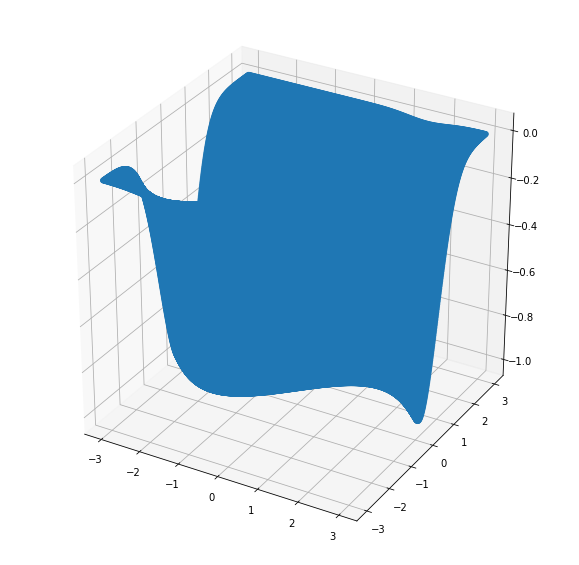

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, zs=Z)
plt.show()

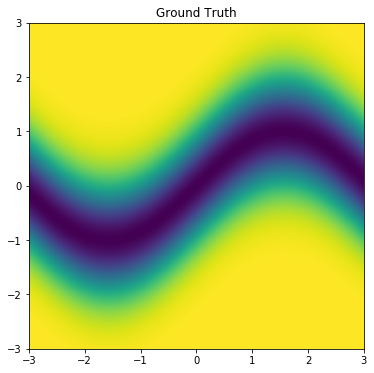

In [5]:
# color mesh map for ground truth
plt.figure(figsize=(6,6))
plt.pcolormesh(X, Y, Z, shading='auto')
plt.title('Ground Truth')
plt.show()

In [18]:
# sample data 
n = 100 
sample_x = x[np.random.choice(len(x), size=n, replace=False)]
sample_y = y[np.random.choice(len(y), size=n, replace=False)]
sample_z = f(sample_x, sample_y)

# inverse weighted distance interpolation
pos = np.vstack((sample_x, sample_y)).T
f_predict = idw(pos, sample_z)

In [70]:
inputx = np.linspace(-3, 3, 500)
inputy = np.linspace(-3, 3, 500)
# meshgrid = np.vstack((inputx, inputy)).T
# z_predict = f_predict(meshgrid)
# Z2 = np.meshgrid(z_predict)
# print(Z2)

In [79]:
X1, Y1 = np.meshgrid(inputx, inputy)
Z1 = []
for i in range(len(X1)):
    xrow = X1[i]
    yrow = Y1[i]
    row_grid = np.vstack((xrow, yrow)).T
    z_row = f_predict(row_grid)
    Z1.append(z_row)

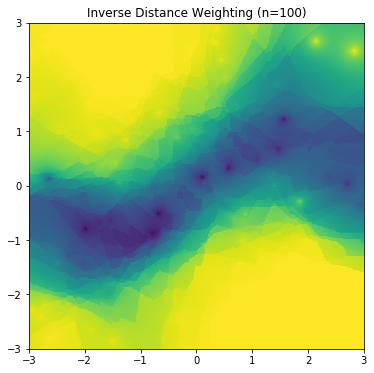

In [87]:
# color mesh map for ground truth
plt.figure(figsize=(6,6))
plt.pcolormesh(X1, Y1, Z1, shading='auto')
plt.title('Inverse Distance Weighting (n=100)')
plt.show()

In [72]:
# error
err = np.linalg.norm(np.abs(np.subtract(Z1, Z)))
print(err)

62.13816344339125


In [73]:
def run_IDW(n):
    sample_x = x[np.random.choice(len(x), size=n, replace=False)]
    sample_y = y[np.random.choice(len(y), size=n, replace=False)]
    sample_z = f(sample_x, sample_y)
    pos = np.vstack((sample_x, sample_y)).T
    f_predict = idw(pos, sample_z)
    inputx = np.linspace(-3, 3, 500)
    inputy = np.linspace(-3, 3, 500)
    X1, Y1 = np.meshgrid(inputx, inputy)
    Z1 = []
    for i in range(len(X1)):
        xrow = X1[i]
        yrow = Y1[i]
        row_grid = np.vstack((xrow, yrow)).T
        z_row = f_predict(row_grid)
        Z1.append(z_row)
    return Z1

def calculate_err(Z_predict):
    return np.linalg.norm(np.abs(np.subtract(Z, Z_predict)))

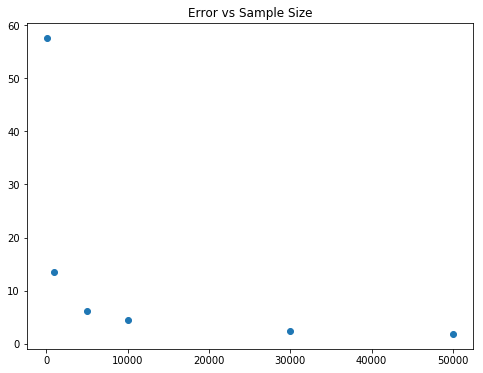

In [95]:
x = np.linspace(-3, 3, 50000)
y = np.linspace(-3, 3, 50000)
sample_sizes = [100, 1000, 5000, 10000, 30000, 50000]
errors = []
for size in sample_sizes:
    Z_predict = run_IDW(size)
    errors.append(calculate_err(Z_predict))
plt.figure(figsize=(8,6))
plt.scatter(sample_sizes, errors)
plt.title('Error vs Sample Size')
plt.show()

In [97]:
print(errors)

[57.670033241910836, 13.452736210214841, 6.201902151346506, 4.397495140409884, 2.393707437942266, 1.8514159345946428]


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


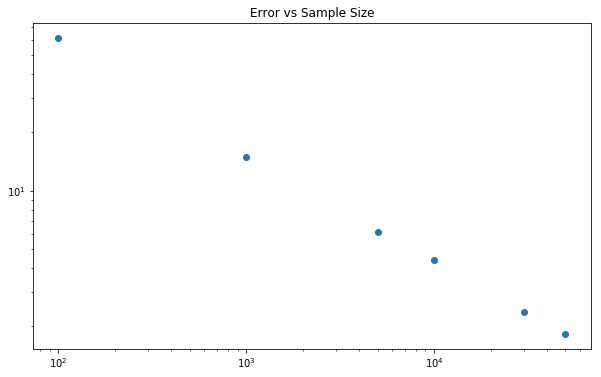

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(sample_sizes, errors)
plt.title('Error vs Sample Size')
ax = plt.axes()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

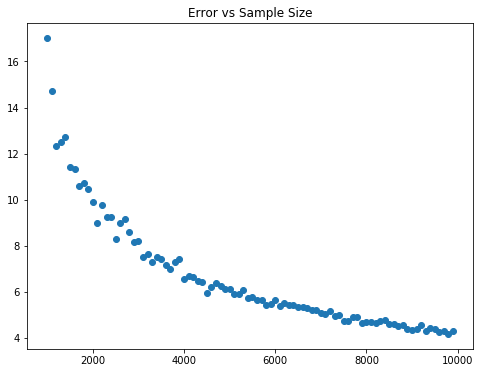

In [100]:
x = np.linspace(-3, 3, 50000)
y = np.linspace(-3, 3, 50000)
sample_sizes = np.arange(1000, 10000, 100)
errors2 = []
for size in sample_sizes:
    Z_predict = run_IDW(size)
    errors2.append(calculate_err(Z_predict))
plt.figure(figsize=(8,6))
plt.scatter(sample_sizes, errors2)
plt.title('Error vs Sample Size')
plt.show()

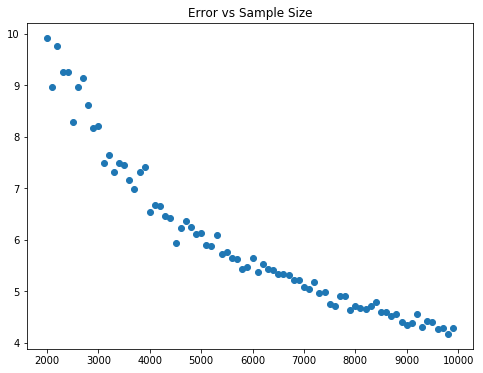

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(sample_sizes[10:], errors2[10:])
plt.title('Error vs Sample Size')
# ax = plt.axes()
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.show()